# Steganography

`getRGB()` may take a little while to run for large image files (we cannot resize them without messing up any embedded messages!)


In [1]:
# libraries!
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import copy
import time

In [6]:
def getRGB(filename):
    """ reads a png or jpg file like 'pitzer_grounds.jpg' (a string)
        returns the pixels as a list-of-lists-of-lists
        this is accessible, but not fast: Use small images!
    """
    original = Image.open(filename)
    print(f"Reading image from '{filename}':")
    print(f"  Format: {original.format}\n  Original Size: {original.size}\n  Mode: {original.mode}")
    WIDTH, HEIGHT = original.size
    px = original.load()
    PIXEL_LIST = []
    for r in range(HEIGHT):
        row = []
        for c in range(WIDTH):
            row.append( px[c,r][:3] )
        PIXEL_LIST.append( row )
    return PIXEL_LIST

img = getRGB("coffee.jpg")
flag = getRGB("flag_saying_hi.png")

Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB
Reading image from 'flag_saying_hi.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB


In [7]:
def set_size(width, height, ax=None):
    """Sets the size of an image when printing in the notebook
       w, h: width, height in inches """
    w = width; h = height
    if not ax: 
        ax=plt.gca()  # gets current axes
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

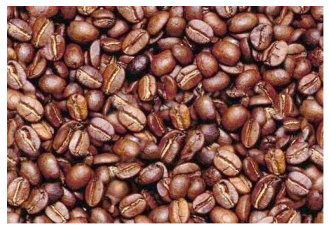

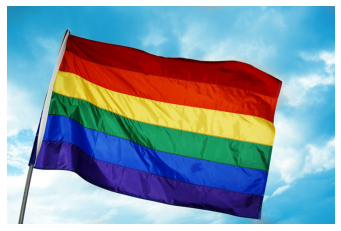

In [8]:
# wrapper for matplotlib's imshow function
def show_image( rgbdata, hgt_in=None, wid_in=None ):
    """ shows an image whose pixels are in rgbdata 
        note:  rgbdata is a list-of-rows-of-pixels-of-rgb values, _not_ a filename!
            use getRGB() to get this data!
        hgt_in is the desired height (in inches)
        wid_in is the desired width (in inches)
            use set_size() with these parameters
        _but_ the library will not change the aspect ratio (takes the smaller)
        by default, the hgt_in and wid_in are the image's original size
        (and feel free to change these!)
    """
    fig, ax = plt.subplots()               # obtains the figure and axes objects
    
    if type(rgbdata[0][0]) == list:
        im = ax.imshow(rgbdata)            # this is matplotlib's call to show an image 
    if type(rgbdata[0][0] == int):
        im = ax.imshow(rgbdata, cmap="gray")

    if hgt_in != None and wid_in == None:
        wid_in = hgt_in
    if hgt_in != None:
        set_size(width=wid_in, height=hgt_in)  # matplotlib will maintain the image's aspect ratio
    
    ax.axis('off')                         # turns off the axes (in units of pixels)
    plt.show()                             # show the image

# show the coffee image
show_image(img)
show_image(flag)


In [9]:
def saveRGB( PX, filename ):
    """ saves a list-of-lists-of-lists of rgb pixels (PX) where
        len(PX) == the # of rows
        len(PX[0]) == the # of columns
        len(PX[0][0]) should be 3 (rgb)
    """
    boxed_pixels = PX
    print( 'Starting to save', filename, '...' )
    H = len(PX)
    W = len(PX[0])
    im = Image.new("RGB", (W, H), "black")
    px = im.load()
    for r in range(H):
        for c in range(W):
            bp = boxed_pixels[r][c]
            t = tuple(bp)
            px[c,r] = t
    im.save( filename )
    time.sleep(0.42)   # give the filesystem some time...
    print( filename, "saved." )    

## Test it out

Let's view the first few pixels of the 'flag.png' image

We'll march in "English-reading" order (across the 0th row first, then to the next row)

Remember that each pixel has an r, g, and b value

We will convert each of these values to an 8-bit binary number (ex 42 --> '00101010')

In [12]:
filename = 'flag_saying_hi.png'   # feel free to change this

image_rgb = getRGB(filename)

for row in range(0,1):
    for col in range(0,3):
        print(f"pixel at {row},{col} is {image_rgb[row][col]}")
        for value in image_rgb[row][col]:
            binary = bin(value)[2:]
            nbits = len(binary)    # to make sure we have 8 bits...
            binary = '0'*(8-nbits) + binary
            print(f"   value: {value} is the bits: {binary}")

Reading image from 'flag_saying_hi.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB
pixel at 0,0 is (46, 131, 160)
   value: 46 is the bits: 00101110
   value: 131 is the bits: 10000011
   value: 160 is the bits: 10100000
pixel at 0,1 is (46, 133, 162)
   value: 46 is the bits: 00101110
   value: 133 is the bits: 10000101
   value: 162 is the bits: 10100010
pixel at 0,2 is (44, 134, 166)
   value: 44 is the bits: 00101100
   value: 134 is the bits: 10000110
   value: 166 is the bits: 10100110


In [24]:
def desteganographize(image_rgb):
    """Extracts a message hidden in an image's RGB data"""
    
    num_rows = len(image_rgb) 
    num_cols = len(image_rgb[0])
    sub = ""
    sub2 = ''
    message = ""
    signal = False
    
    for row in range(num_rows):
        # print(f"row is {row}")
        for col in range(num_cols):
            item = image_rgb[row][col]
            for value in item:
                binary = bin(value)[2:]
                sub += binary[-1]
                if sub[-8:] == '00000000':
                    signal = True       # Tells the for loops to terminate if sub has 00000000 at the end
                    break
            if signal == True:          # Tells the for loops to terminate if sub has 00000000 at the end
                break
        if signal == True:              # Tells the for loops to terminate if sub has 00000000 at the end
            break
    for number in sub:
        if len(sub2) < 8:
            sub2 += number
        else:
            val = int(sub2, 2)
            message += chr(val)
            sub2 = '' + number
            
    return message
    
    

In [25]:
#
#

filename = 'flag_with_coffee_article.png'   # Changeable!
image_rgb = getRGB(filename)
message = desteganographize(image_rgb)
print()
print(f"message is {message}")

Reading image from 'flag_with_coffee_article.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB

message is Can coffee help you live longer?

Certain compounds in the brew are beneficial.

You may think of coffee as just a part of your morning routine. But it may be part of a longer, healthier life. A study published in The New England Journal of Medicine found that among older adults, those who drank coffee (caffeinated or decaf) had a lower risk of dying from diabetes, heart disease, respiratory disease, and other medical complications than non-coffee drinkers. "I think the evidence is pretty substantial now; it seems to be beneficial across the board," says Dr. Eric Rimm, associate professor of epidemiology and nutrition at the Harvard School of Public Health.

What they found:

Researchers looked at survey responses regarding the coffee habits of more than 400,000 older men and women. After adjusting for the effects of other risk factors such as alcohol consumption and smo

In [28]:
filename = 'flag_saying_hi.png'   # Changeable!
image_rgb = getRGB(filename)
message = desteganographize(image_rgb)
print()
print(f"message is {message}")

Reading image from 'flag_saying_hi.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB

message is Hi!


In [30]:
def steganographize( image_rgb, message ):
    """Embeds a message in an image's RGB data"""
    
    num_rows = len(image_rgb) 
    num_cols = len(image_rgb[0])
    print(f"There are {num_rows} rows and {num_cols} columns\n")
    
    #
    # some helper code to convert to individual zeros and ones...
    #
    binaryMessage = ""
    for char in message:
        value = ord(char)
        binary = bin(value)[2:]
        nbits = len(binary)    # to make sure we have 8 bits...
        binary = '0'*(8-nbits) + binary
        binaryMessage += binary
    binaryMessage += '00000000'
    
    ml = len(binaryMessage)
    available = num_rows*num_cols*3
    print(f"Message in binary is {binaryMessage} (with {ml//3} full pixels and {ml%3} extra values)")
    print(f"This image has {available} pixels\n")
    
    if ml > available:
        print(f"There is not enough space to encode your message here...")
        return 42
    
    new_rgb = copy.deepcopy(image_rgb)
    BM = 0
    for row in range(num_rows):
        print(f"row is {row}")
        for col in range(num_cols):
            r, g, b = new_rgb[row][col]
            if BM >= ml: return new_rgb
            bit = int(binaryMessage[BM])
            if r%2 == bit%2: pass
            elif r%2 == 0: r += 1
            else: r -= 1
            BM += 1

            if BM >= ml: return new_rgb
            bit = int(binaryMessage[BM])
            if g%2 == bit%2: pass
            elif g%2 == 0: g += 1
            else: g -= 1
            BM += 1

            if BM >= ml: return new_rgb
            bit = int(binaryMessage[BM])
            if b%2 == bit%2: pass
            elif b%2 == 0: b += 1
            else: b -= 1
            BM += 1
            
            new_rgb[row][col] = (r, g, b)
            
    return new_rgb

In [40]:
filename = "flag.png"   # the image to embed the message in
message = "this lab problem was pretty tough to understand"   # the message

image_rgb = getRGB(filename)
image_new = steganographize(image_rgb, message)

Reading image from 'flag.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB
There are 415 rows and 625 columns

Message in binary is 011101000110100001101001011100110010000001101100011000010110001000100000011100000111001001101111011000100110110001100101011011010010000001110111011000010111001100100000011100000111001001100101011101000111010001111001001000000111010001101111011101010110011101101000001000000111010001101111001000000111010101101110011001000110010101110010011100110111010001100001011011100110010000000000 (with 128 full pixels and 0 extra values)
This image has 778125 pixels

row is 0


In [38]:
# choose a name for the image you will create
savefile = "image_with_message.png"   # save the _new_ image

saveRGB(image_new, savefile)

Starting to save image_with_message.png ...
image_with_message.png saved.


In [39]:
image_rgb = getRGB(savefile)
message = desteganographize(image_rgb)
print(f"message is {message}")

Reading image from 'image_with_message.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB
message is this program was pretty tough to understand


In [ ]:
# Change the image color scale!

def greyscaleHelp( rgbpixel ):
    """ Helper Function
        rgbpixel should be in the form [r,g,b]
        returns [newred, newgreen, new blue],
        based on their old versions!
    """
    [r,g,b] = rgbpixel
    lum = (21 * r)//100 + (72 * g)//100 + (7 * b)//100   # a generic formula to convert rgb to greyscale
    return lum   # returns a single number

In [ ]:
def greyscale( image ):
    """Makes an image grayscale"""
    
    new_image = [[ greyscaleHelp(pix) for pix in row] for row in image]   # sick list comprehension
    return new_image

In [ ]:
filename = "flag.png"   # image to greyscale-ify

rgb = getRGB(filename)
grey_filename = greyscale(rgb)
print(f"Here's part of the first row of pixels: {grey_filename[0][0:10]}...")
show_image(grey_filename)

In [ ]:
resizeMe = "flag.jpg"   # image to resize
newImage = "smallflag.jpg"   # name for resized image (new)

#
# rescaling
#
original = Image.open(resizeMe)
print(f"Reading image from '{resizeMe}':")
print(f"  Format: {original.format}\n  Original Size: {original.size}\n  Mode: {original.mode}")
max_dim = max(original.size)
scale = max_dim/200   # maximum pixel dimension is 200
new_size = tuple([round(x/scale) for x in original.size])
new = original.resize(new_size,Image.ANTIALIAS)
new.save(newImage,optimize=True, quality=95)
print(f"New size is {new_size}")
show_image(getRGB(newImage))

In [ ]:
def steg_image(original, embed):
    """Embeds an image (embded) in another image's (original) RGB data"""
    
    num_rows = len(original) 
    num_cols = len(original[0])
    
    R = len(embed)
    C = len(embed[0])
    
    print(f"\nThere are {num_rows} rows and {num_cols} columns in the original image")
    print(f"There are {R} rows and {C} columns in the embedded image")
    
    available = num_rows*num_cols*3
    
    print(f"Embedded greyscale image has {R*C*8} bits")
    print(f"This image has {available} pixel values\n")
    
    if R*C*8 > available:
        print(f"There is not enough space to encode your message here...")
        return 42
    


In [ ]:
def desteg_image(steg):
    """Extracts an image hidden in an image's RGB data"""
    
    num_rows = len(steg) 
    num_cols = len(steg[0])
    print(f"There are {num_rows} rows and {num_cols} columns\n")
    sub = ""
    newImage = []
    end = False
    
    for row in range(num_rows):
        for col in range(num_cols):
            pass


In [ ]:
# file1 = "flag.jpg"   # main image
# file2 = "smallflag.jpg"   # embedded image

# original = getRGB(file1)
# embed = getRGB(file2)

# steg = steg_image(original, embed)

# show_image(steg)

# print("\n[DESTEGGING]\n")
# desteg = desteg_image(steg)
# print(f"There is {len(desteg)} desteg data")
# print(f"Here is some of it: {desteg[:42]} ... {desteg[-42:]}")

# show_image(desteg.reshape(Image.open(file2).size))

In [ ]:
# savefile = "funny.png"   # save the _new_ image
# saveRGB(steg, savefile)
# show_image(desteg_image(getRGB(savefile)).reshape(Image.open(file2).size))   # and open the embedded image